start program time at Sun Jun  3 15:58:53 2018


/Users/huxinyu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


start  0 fold at  Sun Jun  3 15:58:58 2018
             precision    recall  f1-score   support

          1       0.58      0.22      0.32     21184
          2       0.57      0.87      0.69     28331
          3       0.66      0.72      0.69      3576
          4       0.77      0.18      0.29       275
          5       0.02      0.03      0.03       950
          6       0.13      0.07      0.09      1737
          7       0.98      0.21      0.35      2051

avg / total       0.57      0.56      0.51     58104

end  0 fold at Sun Jun  3 15:58:59 2018


start  1 fold at  Sun Jun  3 15:58:59 2018


/Users/huxinyu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.65      0.26      0.37     21184
          2       0.59      0.94      0.73     28330
          3       0.80      0.97      0.88      3576
          4       0.52      0.04      0.07       275
          5       0.00      0.00      0.00       950
          6       0.10      0.01      0.01      1737
          7       1.00      0.02      0.04      2051

avg / total       0.62      0.62      0.55     58103

end  1 fold at Sun Jun  3 15:59:00 2018


start  2 fold at  Sun Jun  3 15:59:00 2018
             precision    recall  f1-score   support

          1       0.79      0.59      0.68     21184
          2       0.73      0.93      0.82     28330
          3       0.69      0.99      0.81      3576
          4       0.80      0.07      0.13       275
          5       0.00      0.00      0.00       950
          6       0.00      0.00      0.00      1737
          7       1.00      0.29      0.45      2051

avg / tot

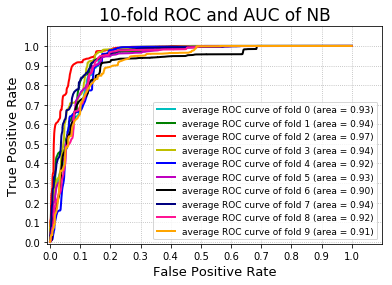

In [10]:
import numpy as np  
import pandas as pd  
import matplotlib as mpl  
import matplotlib.pyplot as plt  
from sklearn import metrics  
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from time import ctime
from time import time
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#set the start time
startProgramTime = time()
print('start program time at', ctime(startProgramTime))

#upload the dataset
rawdata = pd.read_csv('covtype.data.csv', header=None)
rawdata = rawdata.values
data = rawdata[:,0:54]
label = rawdata[:,54]

#normalization training data
min_max_scaler = preprocessing.MinMaxScaler()
standard_data = min_max_scaler.fit_transform(data)

#create 10 fold and result variables
ten_fold = StratifiedKFold(n_splits=10)
ten_accuracy =  np.zeros(10)
ten_precision = np.zeros(10)
ten_recall = np.zeros(10)
ten_f1 = np.zeros(10)
ten_matrix = np.zeros(490).reshape(10,7,7)
ten_fpr=np.zeros(10)
ten_tpr=np.zeros(10)
ten_auc=np.zeros(10)

# accumulate the runtime of every fold
operaTime = 0

# initialize i and plot colors
i = 0
colors = ['c', 'g', 'r', 'y', 'b', 'm', 'k', 'navy', 'deeppink', 'orange']

# construct the Naive Bayes classifier
clf = MultinomialNB(alpha=0.01)

#start 10-fold training
for train, test in ten_fold.split(data, label):
    startTime = time()
    print('start ', i, 'fold at ', ctime(startTime))
    
    #PCA
    #pca = PCA(n_components=0.95,whiten=True)
    #train_x  = pca.fit_transform(standard_data[train])
    #test_x = pca.transform(standard_data[test])
    
    #test result without pca
    train_x = standard_data[train]
    test_x = standard_data[test]
    
    # set the Naive Bayes classifier
    clf.fit(train_x, label[train])

    # predict by Naive Bayes classifier
    predicted = clf.predict(test_x)

    # measure accuracy value
    accuracy = accuracy_score(label[test], predicted)

    # measure precision,recall,fscore,support value
    precision, recall, fscore, support = precision_recall_fscore_support(label[test], predicted)

    # print report for extensive analysis
    print(classification_report(label[test], predicted))
    
    #add roc for each fold on the plot
    y_one_hot = label_binarize(label[test], classes=[1,2,3,4,5,6,7])
    y_score = clf.predict_proba(test_x)
    metrics.roc_auc_score(y_one_hot, y_score)  
    fpr, tpr, thresholds = metrics.roc_curve(y_one_hot.ravel(),y_score.ravel()) 
    auc=metrics.auc(fpr, tpr) 
    plt.plot(fpr, tpr,label='average ROC curve of fold %d (area = %0.2f)' % (i, auc),
             color=colors[i], linestyle='-', linewidth=2)
        
    # get average result based on the seven types
    ten_accuracy[i] = np.average(accuracy)
    ten_precision[i] = np.average(precision)
    ten_recall[i] = np.average(recall)
    ten_f1[i] = np.average(fscore)
    ten_matrix[i] = confusion_matrix(label[test], predicted)
    endTime = time()
    print('end ', i, 'fold at', ctime(endTime))
    print('\n')
    i += 1
    
#get end time for whole process
endProgramTime = time()

# get average final result
print('Extensive Analysis')
print('Average Accuracy: ', np.average(ten_accuracy))
print('Average Precision: ', np.average(ten_precision))
print('Average Recall: ', np.average(ten_recall))
print('Average fscore: ', np.average(ten_f1))
np.set_printoptions(suppress=True)
print('Average Confusion Matrix:\n',np.average(ten_matrix,axis = 0))
print('Total Time:', endProgramTime-startProgramTime)

#plot the roc and auc of ten folds
plt.xlim((-0.01, 1.10))  
plt.ylim((-0.01, 1.10))  
plt.xticks(np.arange(0, 1.1, 0.1))  
plt.yticks(np.arange(0, 1.1, 0.1))  
plt.xlabel('False Positive Rate', fontsize=13)  
plt.ylabel('True Positive Rate', fontsize=13)  
plt.grid(b=True, ls=':')  
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=9)  
plt.title('10-fold ROC and AUC of NB', fontsize=17)  
plt.show()  
    